# Oasis Infobyte Iris Classification 

## Author : Pathan Mobina Sulthana

## Clasiffication of Iris Species based on the different flower Measurements.

## Importing required libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing and reading the dataset into dataframe df

In [73]:
df=pd.read_csv("Iris.csv")

In [74]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Checking for columns list

In [75]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Checking for null values

In [76]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## There is no null values.

## Checking for incorrect data types

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## There is no incorrect data types

## Destcriptive statistics

In [78]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


## Encoding for Species column

In [79]:
from sklearn.preprocessing import LabelEncoder

## unique species

In [80]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [81]:
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

In [82]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## unique species after encoding

In [83]:
df["Species"].unique()

array([0, 1, 2])

In [84]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [85]:
import seaborn as sns

## Correlation matrix for data

<AxesSubplot:>

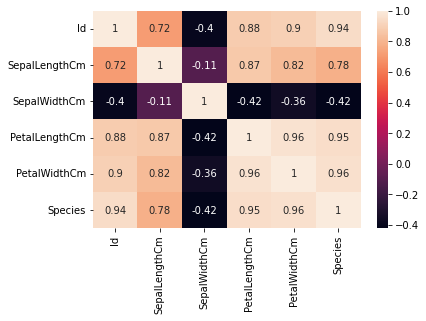

In [86]:
sns.heatmap(df.corr(),annot=True)

## columns which are highly correlated with target variable

In [102]:
highcol=[]
for i in df.drop("Species",axis=1).columns:
    c=df[i].corr(df["Species"])
    if c>0.9:
        highcol.append(i)
print(highcol)
        

['Id', 'PetalLengthCm', 'PetalWidthCm']


## defining input and target variables

In [103]:
x=df[highcol]
y=df["Species"]

## checking for outliers

<AxesSubplot:>

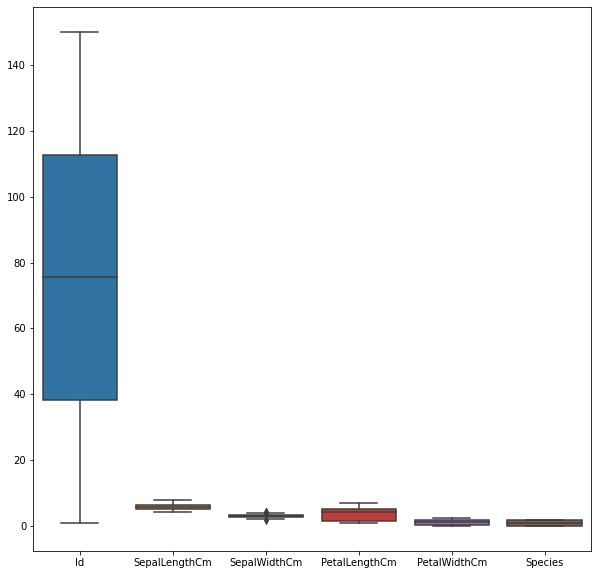

In [104]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']])

## There is no outliers in this data.

## Deviding data into training and testing parts.

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=99)

In [107]:
xtrain

,Id,PetalLengthCm,PetalWidthCm
10,11,1.5,0.2
25,26,1.6,0.2
13,14,1.1,0.1
131,132,6.4,2.0
65,66,4.4,1.4
...,...,...,...
148,149,5.4,2.3
149,150,5.1,1.8
68,69,4.5,1.5
35,36,1.2,0.2


In [108]:
ytrain

10     0
25     0
13     0
131    2
65     1
      ..
148    2
149    2
68     1
35     0
129    2
Name: Species, Length: 105, dtype: int64

In [109]:
xtest

,Id,PetalLengthCm,PetalWidthCm
139,140,5.4,2.1
8,9,1.4,0.2
74,75,4.3,1.3
120,121,5.7,2.3
4,5,1.4,0.2
89,90,4.0,1.3
78,79,4.5,1.5
108,109,5.8,1.8
24,25,1.9,0.2
70,71,4.8,1.8


In [110]:
ytest

139    2
8      0
74     1
120    2
4      0
89     1
78     1
108    2
24     0
70     1
122    2
87     1
127    2
94     1
124    2
16     0
9      0
71     1
81     1
106    2
84     1
51     1
46     0
80     1
117    2
6      0
43     0
147    2
58     1
104    2
30     0
116    2
15     0
72     1
92     1
2      0
49     0
135    2
112    2
97     1
86     1
67     1
126    2
125    2
82     1
Name: Species, dtype: int64

## Elbow method for finding no of clusters

In [111]:
from sklearn.cluster import KMeans

[282018.3244, 70649.63226666665, 31326.8868, 17809.233347193345, 11558.278557114929, 7917.721408974359, 5922.250190193865, 4567.284690058479, 3574.108598856209, 2965.404863095238, 2472.3988608058607, 2045.7730694305692, 1815.3388283383274, 1566.7157727272727]


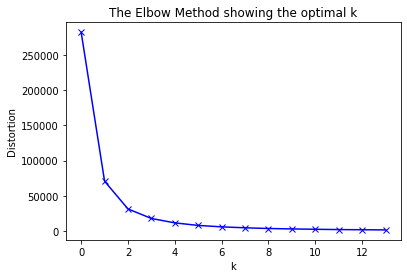

In [112]:
inertias = []
for i in range(1,15):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(df)
    inertias.append(kmeanModel.inertia_)
print(inertias)
plt.plot(inertias,'-bx')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
   


##  The optimul no of clusters or classification is 3  from the elbow method.

In [113]:
from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix

## Here we are using classification models like Logistic Regression ,KNeighborsClassifier,Supportvectormachine(SVM)

## LogistricRegression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lor=LogisticRegression()

In [116]:
lor.fit(xtrain,ytrain)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [117]:
lorpred=lor.predict(xtest)

In [118]:
lorpred

array([2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1,
       0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2,
       1])

In [119]:
loracc=accuracy_score(ytest,lorpred)
lortrainaccc=accuracy_score(ytrain,lor.predict(xtrain))
print(lortrainaccc)
print(loracc)


1.0
1.0


## KNeighborsClassifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn=KNeighborsClassifier(n_neighbors=3)

In [122]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [123]:
knnpred=knn.predict(xtest)

In [124]:
knntestaccu=accuracy_score(ytest,knnpred)

In [125]:
knntestaccu

1.0

In [126]:
knntrainacc=accuracy_score(ytrain,knn.predict(xtrain))

In [127]:
knntrainacc

1.0

## SupportVectorMachine

In [128]:
from sklearn.svm import  SVC


In [129]:
svm=SVC()

In [130]:
svm.fit(xtrain,ytrain)

SVC()

In [131]:
svmpred=svm.predict(xtest)

In [132]:
svmacc=accuracy_score(ytest,svmpred)

In [133]:
svmacc

0.9777777777777777

In [134]:
svmtrainacc=accuracy_score(ytrain,svm.predict(xtrain))

In [135]:
svmtrainacc

0.9809523809523809

## From all above classifiers Logisticregression,KNN classifier Performs well and gave High training and testing  accuracy.